In [ ]:
#mokhnache tafsout M1 SDAD groupe2
# théme:prix de logements

In [3]:
#1\importation des bibliothéques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
import pandas as pd

In [6]:
data=pd.read_excel("fetch_california_housing.xlsx")

In [8]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422


In [9]:
#2décrire un jeu de donneer
#a taille du fichier
print(f"taille du jeu de donneés:{data.shape}")

taille du jeu de donneés:(20640, 9)


In [10]:
# b nombre total de donnees
print(f"nombre total de donnees:{data.size}")

nombre total de donnees:185760


In [11]:
#c nombre d'attributs et leur type:
print("liste des colonnes et leur type:")
print(data.dtypes)

liste des colonnes et leur type:
MedInc        float64
HouseAge        int64
AveRooms      float64
AveBedrms     float64
Population      int64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object


In [12]:
#d natures des attributs;
print("exemple de donnees pour chaque colonne:")
print(data.head())

exemple de donnees pour chaque colonne:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252        41  6.984127   1.023810         322  2.555556     37.88   
1  8.3014        21  6.238137   0.971880        2401  2.109842     37.86   
2  7.2574        52  8.288136   1.073446         496  2.802260     37.85   
3  5.6431        52  5.817352   1.073059         558  2.547945     37.85   
4  3.8462        52  6.281853   1.081081         565  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [13]:
#e vérifier la presence de donnees manqueants:
missing_values=data.isnull().sum()
print("nombre de valeurs manquantes par colonnes:")
print(missing_values)

nombre de valeurs manquantes par colonnes:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [17]:
#f vérifier les donnees aberrantes
#identifier les valeurs aberrantes en utilisant les statistiques discriptives
print(data.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [21]:
#3 préparation des donnees
#a éliminer ou remplacer les donnees manquantes
#supprimer les lignes avec des valeurs manquantes
data_cleaned=data.dropna()

In [24]:
# remplacer les valeurs manquantes par data_cleaned=data.fillna(data.mean())
print(f"taille apres traitement des valeurs manquantes:{data_cleaned.shape}")

taille apres traitement des valeurs manquantes:(20640, 9)


In [26]:
#b décrire le nouveau jeu de donnees
print(data_cleaned.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [27]:
#c fusionner plusieurs dataframes(si applicable):
#merged_data=pd.concat([data1,data2],axis=0)
#print(merged_data.shape)

In [29]:
#d sauvegarder le nouveau jeu de donnes
data_cleaned.to_csv('data_cleaned.csv',index=False)
print("fichier nettoyé sauvgardé sous le nom'data_cleaned.csv'")

fichier nettoyé sauvgardé sous le nom'data_cleaned.csv'


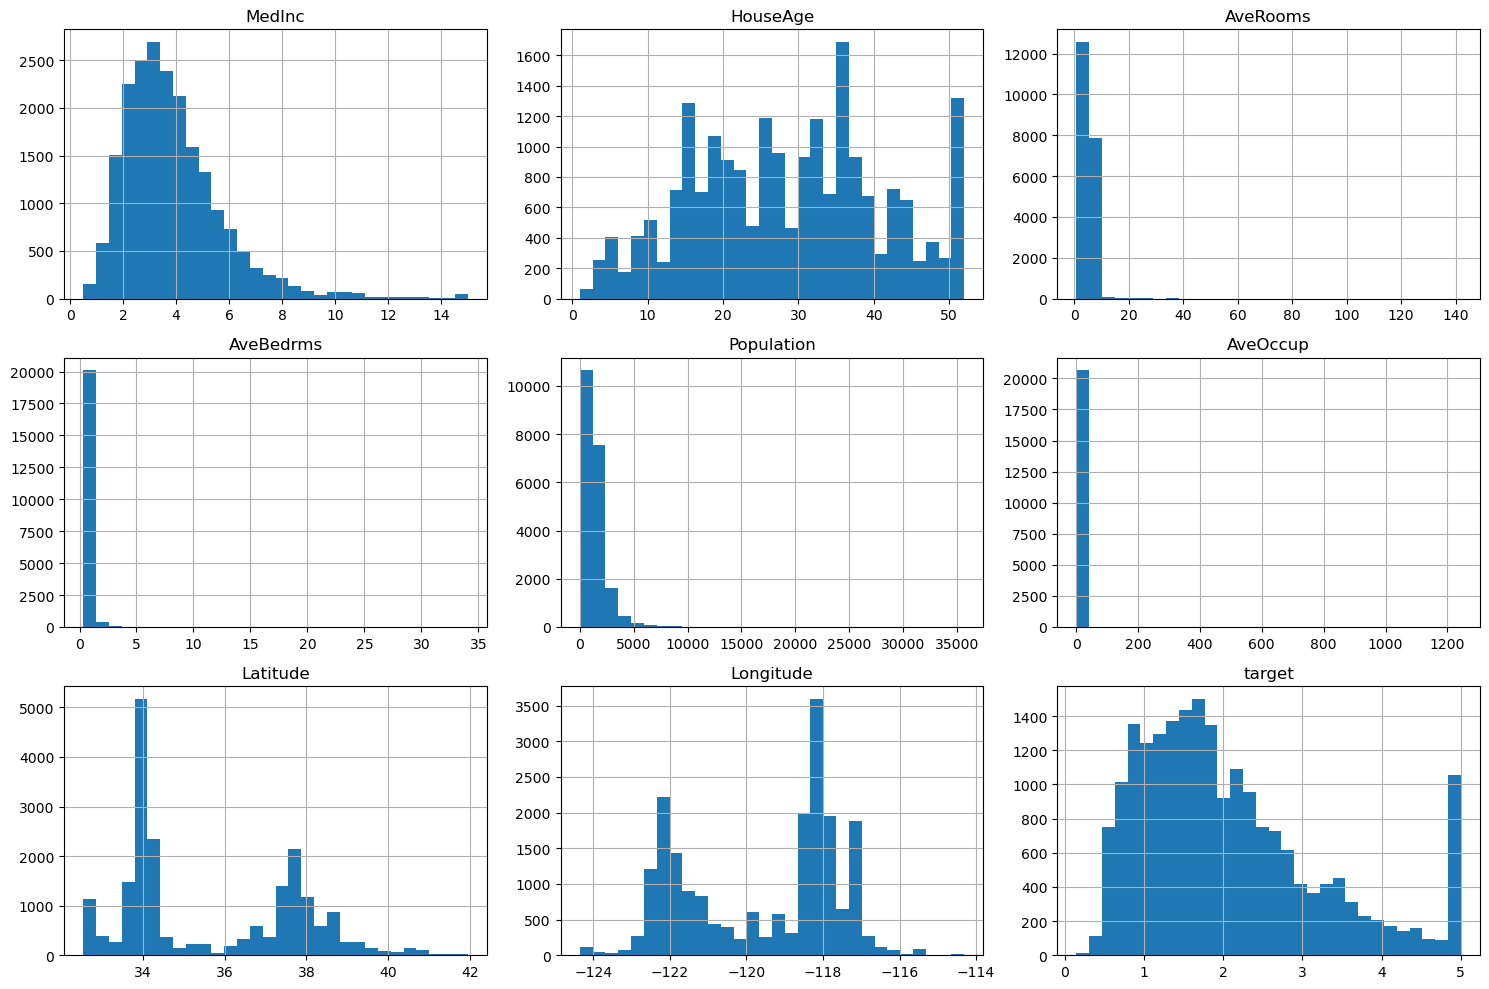

In [32]:
#4 visualisation des donnees 
#a histogrammes des caractéstiques
data_cleaned.hist(bins=30,
                  figsize=(15,10))
plt.tight_layout()
plt.show()

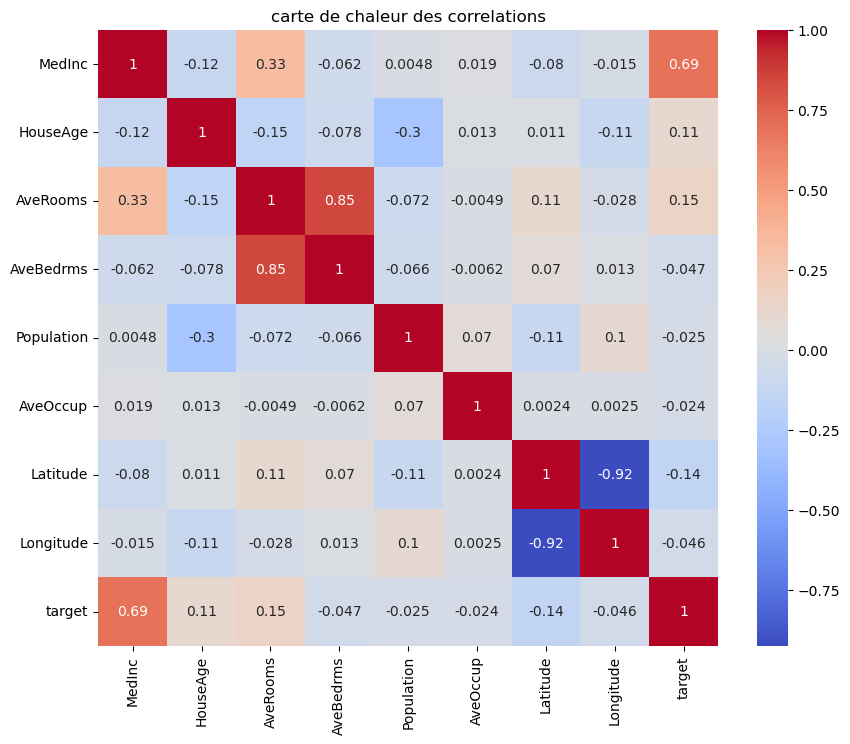

In [34]:
#b relations entre les variable:
#carte de chaleur des correlations
plt.figure(figsize=(10,8))
sns.heatmap(data_cleaned.corr(),
            annot=True,cmap='coolwarm')
plt.title('carte de chaleur des correlations')
plt.show()

In [35]:
#5clustering et/ou régression 
#sélection des colonnes numériques pour le clustering
numerical_data=data_cleaned.select_dtypes(include=[np.number])

In [36]:
#appliquer KMeans
kmeans=KMeans(n_clusters=3,
              random_state=42)
clusters=kmeans.fit_predict(numerical_data)

In [37]:
#ajouter les clusters au dataframe
data_cleaned['cluster']=clusters

In [38]:
print(data.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')


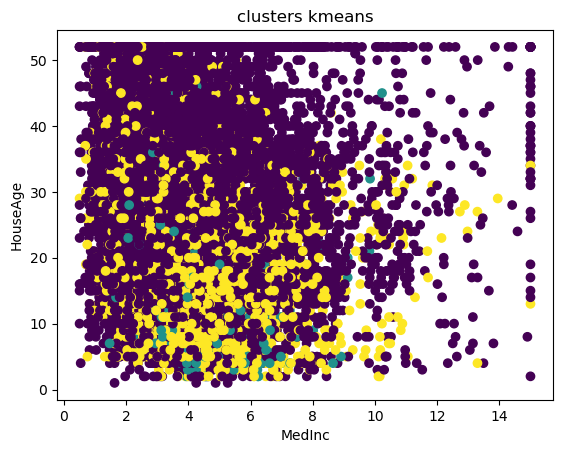

In [39]:
#visualisation des clusters
plt.scatter(data_cleaned['MedInc'],data_cleaned['HouseAge'],
            c=clusters,cmap='viridis')
plt.title('clusters kmeans')
plt.xlabel('MedInc')
plt.ylabel('HouseAge')
plt.show()

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


In [41]:
# regression lineaire
#définier les variable indépandants(x) et dependates (y)
data_cleaned['cluster']=clusters
x=data_cleaned[['MedInc','HouseAge']]
y=data_cleaned['target']


In [43]:
#séparer les donnees en ensembles d'entrainement et de test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
#appliquer la régression lineaire
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [50]:
#faire des prédications
y_pred=model.predict(x_test)

In [51]:
## Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score

In [56]:
#évaluer le modéle
print(f"Erreur quadratique moyenne: {mse}")
print(f"Score R² : {r2}")

Erreur quadratique moyenne: 0.6629874283048177
Score R² : <function r2_score at 0x000001800822BE20>
